In [35]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from glob import glob

DATASET_DIR = Path('data/HYPERVIEW2')

GT_TRAIN_CSV_PATH = DATASET_DIR / 'train_gt.csv'
gt_train_df = pd.read_csv(GT_TRAIN_CSV_PATH)
ydf = gt_train_df.drop(['sample_index'], axis=1)
column_names = ['Fe', 'Zn', 'B', 'Cu', 'S', 'Mn']

<Axes: >

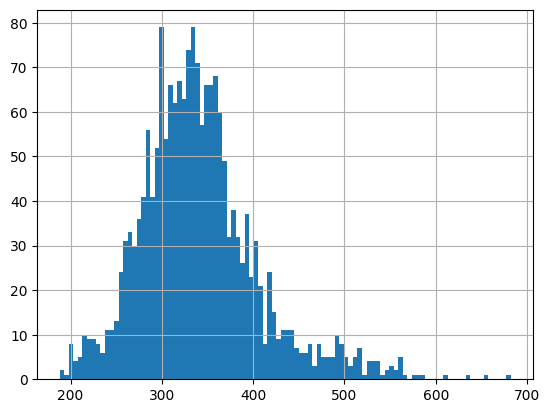

In [36]:
ydf.sum(axis=1).hist(bins=100)

In [44]:
pd.concat([ydf, ydf.sum(axis=1).rename('sum')], axis=1).corr().style.background_gradient()

,B,Cu,Zn,Fe,S,Mn,sum
B,1.000000,0.191813,0.322162,-0.229876,-0.150916,0.139189,-0.177742
Cu,0.191813,1.000000,0.418141,0.326628,0.189779,0.160842,0.409190
Zn,0.322162,0.418141,1.000000,0.359367,-0.156334,-0.069676,0.308155
Fe,-0.229876,0.326628,0.359367,1.000000,0.058912,-0.088533,0.904978
S,-0.150916,0.189779,-0.156334,0.058912,1.000000,0.237886,0.326900
Mn,0.139189,0.160842,-0.069676,-0.088533,0.237886,1.000000,0.299282
sum,-0.177742,0.409190,0.308155,0.904978,0.326900,0.299282,1.000000


<Axes: xlabel='value', ylabel='Count'>

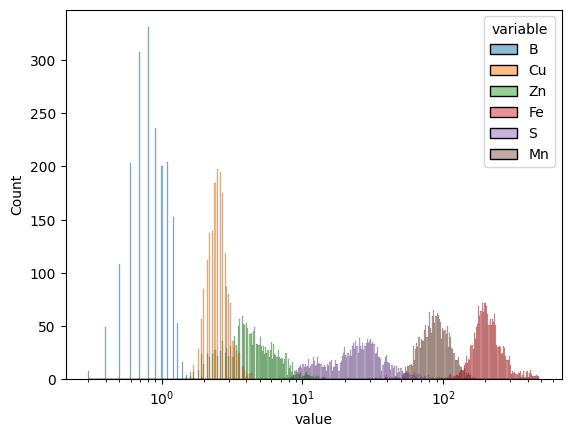

In [45]:
sns.histplot(data=ydf.melt(), hue='variable', x='value', log_scale=True, bins=400)

<Axes: xlabel='value', ylabel='Count'>

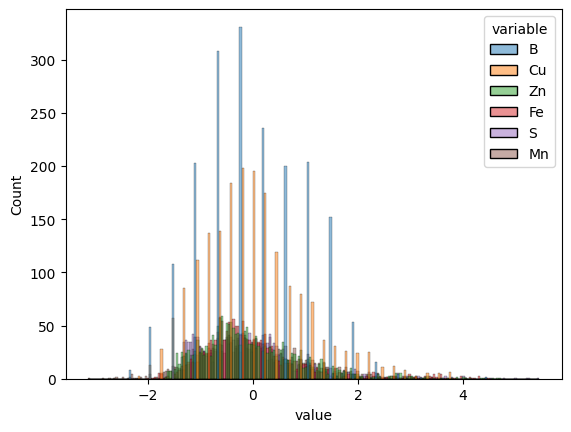

In [49]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
ydf_scaled = scaler.fit_transform(ydf)
ydf_scaled = pd.DataFrame(ydf_scaled, index=ydf.index, columns=ydf.columns)
sns.histplot(data=ydf_scaled.melt(), hue='variable', x='value', log_scale=False, bins=200)

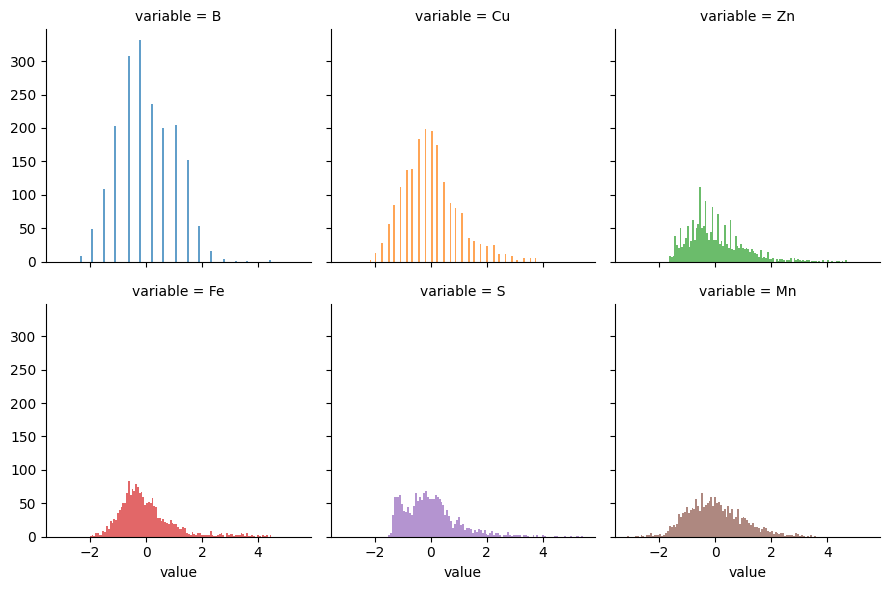

In [52]:
g = sns.FacetGrid(ydf_scaled.melt(), hue='variable', col="variable", col_wrap=3, sharex=True, sharey=True)
g.map(plt.hist, "value", alpha=.7, bins=100)

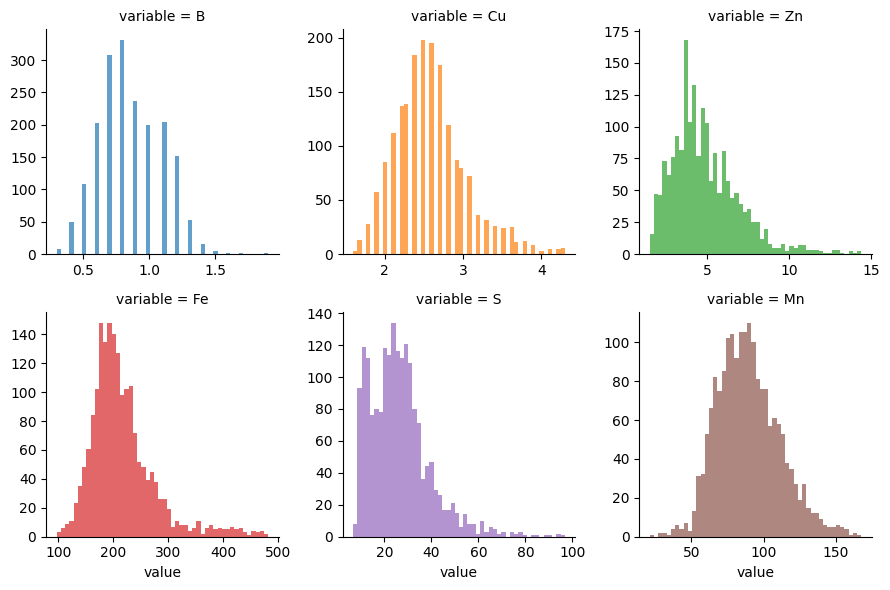

In [54]:
g = sns.FacetGrid(ydf.melt(), hue='variable', col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(plt.hist, "value", alpha=.7, bins=50)

# Conclusions

0. Standarization required.
1. sums S + B + Cu + Fe + Mn + Zn are not equal across observations. Sums are normally distributed. 
2. Two models? 1. for value of S + B + Cu + Fe + Mn + Zn, and 2. for distributions [S, B, Cu, Fe, Mn, Zn ] ?
3. S and Mn seem to be skewed. The leaderboard results show higher MSE for Cu i S elements. Need to be investigated separately.